# <span style="color:green">가상환경</span>

### 가상환경이란?
- 자신이 원하는 python환경 구축을 위해 필요한 모듈 만을 모아놓은 것
- 각각의 가상환경은 독립적이어서 서로 다른 가상환경에 설치된 모듈들의 영향을 받지 않는다.

### 가상환경 설정
가상환경의 대표적인 모듈은 4가지가 있다.
- venv : Python 3.3 버전 이후 부터 기본모듈에 포함됨
- virtualenv : Python 2 버전부터 사용해오던 가상환경 라이브러리, Python 3에서도 사용가능
- conda : Anaconda Python을 설치했을 시 사용할 수있는 모듈 
- pyenv : pyenv의 경우 Python Version Manger임과 동시에 가상환경 기능을 플러그인 형태로 제공

### 가상환경 명령어

#### 가상환경 생성
- conda create –n 가상환경이름 python=파이썬버전 설치할 패키지  
  

#### 가상환경 활성화
- activate
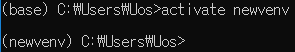

#### 가상환경 목록
- conda env list 가상환경 목록  
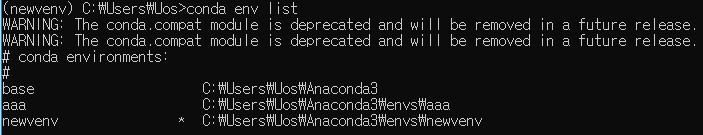

#### 가상환경 지우기
- conda remove -n 가상환경이름 --all  
(conda env remove -n 가상환경이름)
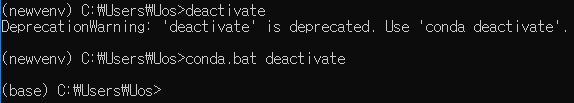
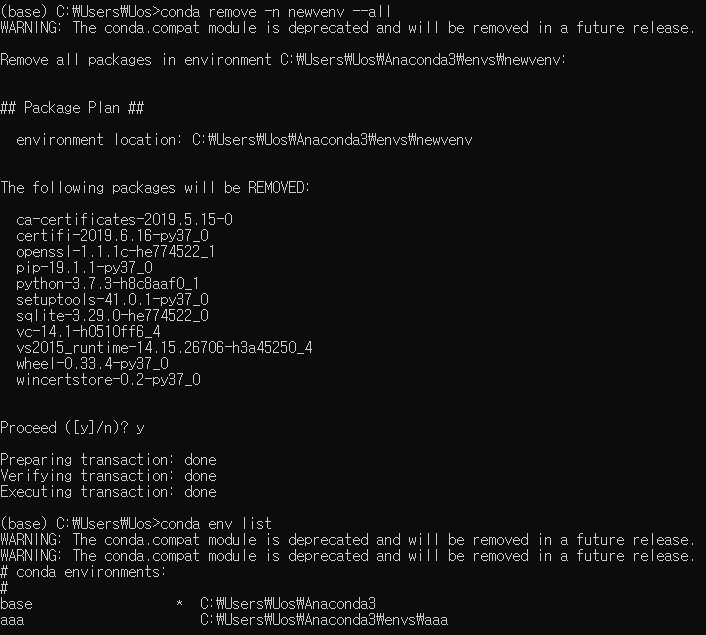

#### 가상환경에 keras 설치하기

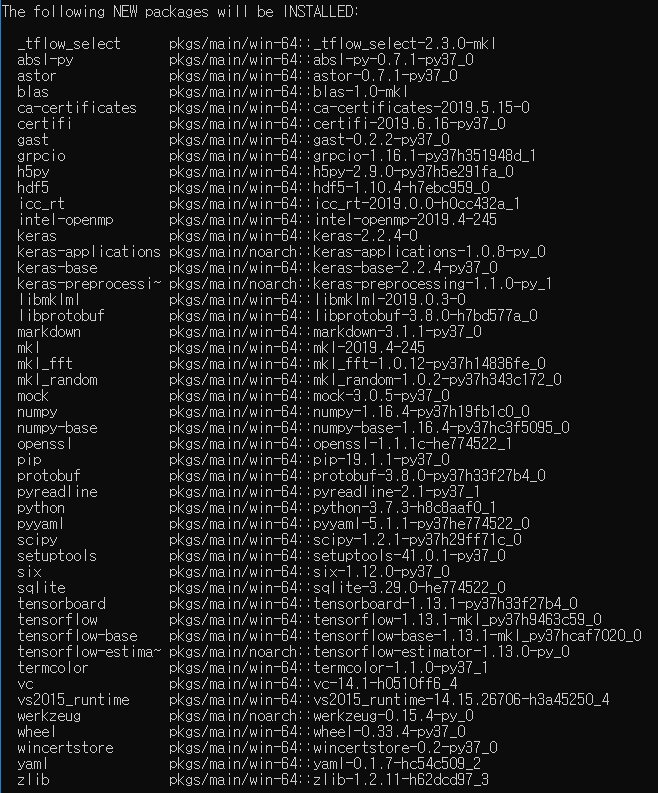
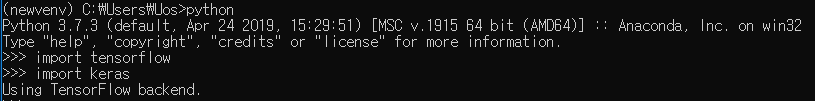

# <span style="color:green">Keras 시작하기</span>

이 문서의 예제 코드는 프랑소와 숄레. "케라스 창시자에게 배우는 딥러닝". 길벗출판사, 2018.를 참고하여 작성되었다 (3장, 5장, 6장).

## Keras 불러오기

In [1]:
from keras import * 
import numpy as np

Using TensorFlow backend.


## 예제 데이터 불러오기

- Keras를 통해 Deep Neural Network를 구성하기에 앞서 예제 데이터를 불러온다.
- 예제 데이터인 IMDB 데이터는 인터넷 영화 데이터베이스로부터 가져온 양극단의 리뷰 5만 개로 이루어진 데이터이다.
- 이 데이터셋은 훈련 데이터 25,000개와 테스트 데이터 25,000개로 나뉘어 있고 각각 50%는 부정, 50%는 긍정 리뷰로 구성되어 있다.
- 가장 많이 사용된 단어 10,000개만 사용하고 나머지 단어는 무시한다.

In [2]:
# IMDB 데이터셋 불러오기
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)
# train데이터와 test데이터의 크기
print(train_data.shape, test_data.shape, "\n")
# 단어를 숫자로 mapping한 문장 
print(train_data[0], "\n")
# 1 : 긍정, 0 : 부정 
print(train_labels)

(25000,) (25000,) 

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 

[1 0 0 ... 0 1 0]


- IMDB 데이터셋이 실제로 어떤 문장인지 알아보자.
- imdb의 get_word_index 메서드에는 데이터셋의 값에 대응하는 단어들이 dictionary형태로 존재한다.
- Dictionary는 get 메서드를 통해 입력되는 key에 대응하는 값을 반환해준다.
- reverse_word_index는 key가 숫자가 되고 value가 단어가 되도록 변환되었기 때문에 get 메서드에 숫자를 입력하면 해당 숫자에 대응하는 단어가 나오게 된다. 
- 데이터셋의 0, 1, 2는 각각 "패딩", "문서시작", "사전에 없음"을 의미하므로 3을 빼주게 된다. 즉, 데이터셋의 4가 사전에서 1에 대응된다.

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

- 문자 (단어) 데이터를 학습하기 위한 방법으로 가장 기본적인 것이 원-핫 인코딩 (one-hot encoding)을 통해 변환하는 것이다.
- 통계에서 dummy 변수를 만드는 것과 비슷한데 데이터의 숫자가 각각 변수명이 되고 해당 숫자가 나타나면 1 나타나지 않으면 0의 값을 갖도록 변환해주는 방법이다.   
- 즉 데이터의 첫번째 관측치 값이 [3, 5, 7, 9]이라면 3, 5, 7, 9번째 열의 값은 1이고 나머지 열의 값은 0이 되는 10000차원 벡터이다.

In [4]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return(results)

- 10,000차원 벡터인 x_train과 x_test 생성하고, 0 또는 1값을 가지는 y_train과 y_test가 생성된다.

In [15]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
print(x_train[0], y_train[0])

[0. 1. 1. ... 0. 0. 0.] 1.0


## Network 구성하기

- Keras로 신경망 모형을 만드는 방법에 대해 알아보자.
- Keras에서는 일반적으로 keras.models.Sequantial() 메서드를 통해 network를 구성할 수 있다.
- fully connected layer는 Keras의 layers.Dense를 통해 구성할 수 있다.
- Dense 메서드의 주요 인자로 units에는 output으로 내보낼 node의 수가 입력받게 되어있고 만약 첫번째 layer라면 input_shape를 통해 입력 데이터의 차원을 할당받는다. activation은 output으로 내보낼 때의 적용할 activation 함수를 지정받는다.
- activation(활성함수)의 종류
    - liner : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력
    - relu : rectifier 함수, 은익층에 주로 사용
    - sigmoid : 시그모이드 함수, 이진 분류 문제에서 출력에 사용
    - softmax : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력사용

In [10]:
model = models.Sequential([layers.Dense(16, input_shape = (10000, ), activation = "relu"),
                          layers.Dense(1, activation = "sigmoid")])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


- Sequential 메서드 안에 모든 network를 구성하는 코드를 입력하는 것 보다 add 메서드를 통해 조금 더 직관적이고 효율적으로 모형을 구성할 수 있다.
- models.Sequential()로 비어있는 모델을 생성 후 input layer부터 하나씩 층을 쌓아서 모델을 구성한다.

In [7]:
model = models.Sequential()
model.add(layers.Dense(16, activation = "relu", input_shape = (10000, )))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

- 모형을 구성한 후, optimization 방법과 손실함수 그리고 모형 매 반복마다 출력할 measure를 지정할 수 있다.
- optimizer 인자는 optimization 방법, loss 인자는 손실함수 그리고 metrics에는 출력할 measure를 지정할 수 있다.

In [9]:
model.compile(optimizer = "rmsprop",
             loss = "binary_crossentropy",
             metrics = ["accuracy"])

- keras.optimizers를 통해 여러가지 optimization 방법을 지정할 수 있고 해당 방법의 hyperparameter를 지정할 수 있다.

In [10]:
# optimizer = optimizers.RMSprop(lr = 0.0001, rho = 0.9, decay = 0.01)
# optimizer = optimizers.sgd(lr = 0.0001, momentum = 0.1, decay = 0.01)
optimizer = optimizers.adam(lr = 0.0001, beta_1 = 0.9, beta_2 = 0.999, decay = 0.01)
# optimizer = optimizers.adamax(lr = 0.0001, beta_1 = 0.9, beta_2 = 0.999, decay = 0.01)
# optimizer = optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
# optimizer = optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)

- metrics에는 기본적으로 정의되어 있는 mae, accuracy등이 존재하고 유저가 정의한 함수 또한 이용할 수 있다.
- metrics를 통해 출력하고자 하는 함수를 정의할 때에는 y_true인자와 y_pred인자가 필요하고 이 두 값을 통해 계산해 정의한 값을 반환해준다.
- 여기서 주의해야할 점은 y_true와 y_pred 값은 tensor 값이므로 tensor를 계산하는 코드로 작성해야한다.

In [11]:
# Customize metrics
def mean_pred(y_true, y_pred):
    return(backend.mean(y_pred))

- optimizer옵션에 세부값을 수정한 optimizer를 사용한다.
- y가 binary이므로 loss에 binary_crossentropy를 사용한다.

In [12]:
model.compile(optimizer = optimizer,
             loss = "binary_crossentropy",
             metrics = ["accuracy", mean_pred])

- 데이터를 train과 validation으로 7:3비율로 나눈다.

In [16]:
ind = np.floor(0.7 * x_train.shape[0]).astype("int")

x_val = x_train[ind:]
y_val = y_train[ind:]

x_train = x_train[:ind]
y_train = y_train[:ind]
print(x_train.shape[0])
print(x_val.shape[0])

17500
7500


- 모형의 훈련은 fit 메서드를 통해 진행할 수 있다.
- fit 메서드의 기본적인 인자로 첫번째와 두번째에 위치한 x, y가 있고 각각 훈련 데이터의 설명변수와 반응변수에 해당한다.
- epochs 인자는 반복횟수를 나타내고 batch_size는 훈련 데이터에서 batch sample로 사용할 크기, validation_data인자는 validation에 사용할 데이터를 튜플 형태로 입력받는다.

In [18]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 100, validation_data = (x_val, y_val))

Train on 17500 samples, validate on 7500 samples
Epoch 1/20
17500/17500 [==============================] - 4s 253us/step - loss: 0.4132 - acc: 0.8840 - mean_pred: 0.5137 - val_loss: 0.4326 - val_acc: 0.8628 - val_mean_pred: 0.5097
Epoch 2/20
17500/17500 [==============================] - 4s 250us/step - loss: 0.4106 - acc: 0.8844 - mean_pred: 0.5139 - val_loss: 0.4304 - val_acc: 0.8632 - val_mean_pred: 0.5096
Epoch 3/20
17500/17500 [==============================] - 4s 256us/step - loss: 0.4082 - acc: 0.8849 - mean_pred: 0.5146 - val_loss: 0.4283 - val_acc: 0.8639 - val_mean_pred: 0.5096
Epoch 4/20
17500/17500 [==============================] - 4s 254us/step - loss: 0.4059 - acc: 0.8857 - mean_pred: 0.5131 - val_loss: 0.4263 - val_acc: 0.8645 - val_mean_pred: 0.5089
Epoch 5/20
17500/17500 [==============================] - 4s 249us/step - loss: 0.4037 - acc: 0.8861 - mean_pred: 0.5138 - val_loss: 0.4244 - val_acc: 0.8649 - val_mean_pred: 0.5092
Epoch 6/20
17500/17500 [=================

- fit 메서드는 History 객체를 반환하게 되는데 이 객체는 훈련하는 동안 발생한 모든 정보를 담고 있는 dictionary이다.
- 기본적으로 이 객체는 손실함수 값과 metrics에 지정한 값을 포함한다.

dict_keys(['val_loss', 'val_acc', 'val_mean_pred', 'loss', 'acc', 'mean_pred']) 

[0.5137110650539398, 0.5138736731665475, 0.5145982095173427, 0.513130064862115, 0.5138422404016767, 0.5133975807258061, 0.5131728596346719, 0.5133756942408425, 0.5135017297949109, 0.5129588213988713, 0.5131284775052751, 0.513205850975854, 0.5133085102694375, 0.5129474461078644, 0.5130648847988674, 0.51266905103411, 0.5133773347309657, 0.5124186134338379, 0.5126689691202981, 0.5127547136374883]


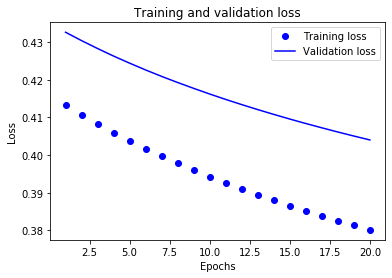

In [20]:
import matplotlib.pyplot as plt
# %matplotlib inline
history_dict = history.history
print(history_dict.keys(), "\n")
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
print(history.history["mean_pred"])

epochs = range(1, len(loss) + 1)
# 훈련과 검증 손실 그래프
plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

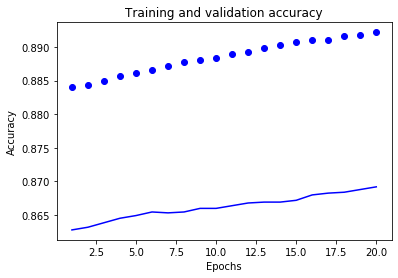

In [21]:
plt.clf()
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]

# 훈련과 검증 정확도 그래프
plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

- 훈련된 모형은 predict 메서드를 통해 시험 데이터에 대한 예측 값을 산출할 수 있다.
- evaluate 메서드를 이용하면 앞서 metrics에 지정했던 값들을 시험 데이터에 대해 산출 할 수 있다.
- 이번 예제에서는 metrics에 accuracy와 mean_pred함수를 지정했고 기본으로 산출되는 손실 함수 값이 반환되어 3개의 값이 산출되는 것을 알 수 있다.

In [118]:
pred_y = model.predict(x_test)
pred_y = pred_y.reshape(pred_y.shape[0])
pred_class = np.where(pred_y > 0.5, 1, 0)

import pandas as pd
pd.crosstab(y_test, pred_class)

col_0,0,1
row_0,,
0.0,10486,2014
1.0,1657,10843


- loss, accuracy, mean_pred 출력

In [119]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 4s 164us/step


[0.43293227157592773, 0.85316, 0.5059385327720642]

# Overfitting과 Dropout, L1 및 L2 regularization

- Overfitting(과적합)은 머신러닝의 전반적인 모형에서 발생하는 문제다.
- True 값을 알고있는 훈련 데이터의 특화된 패턴을 과도하게 학습하여 훈련 데이터에서는 좋은 성능을 보이지만 일반화가 잘 되지 않아 새로운 데이터에서는 좋지 못한 성능을 보이는 것을 말한다.
- Overfitting을 방지하는 방법 중 가장 좋은 방법은 많은 훈련 데이터로 학습하는 방법이다.
- 하지만 훈련 데이터의 수는 대부분 한정되어 있기 때문에 regularization을 통해 overfitting을 방지하는 방법이 요구된다.
- Dropout은 신경망에서 널리 사용되는 regularization 방법 중 하나로 무작위로 layer의 일부 노드의 가중치를 0으로 만드는 방법이다.
- L1과 L2 regularization은 가중치에 각각 L1과 L2 노름 (norm)을 추가하여 가중치가 커지는 것을 막는 방법이다 (가중치의 분포가 균일하게 된다.).
- layers.Dropout(rate = 가중치를 0으로 만드는 비율)
- kernel_regularizer = regularizers.l2(가중치들의 L2 노름에 곱해주는 값, default는 0.01)

In [127]:
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation = 'relu', input_shape = (10000, )))
model.add(layers.Dropout(rate = 0.1))
model.add(layers.Dense(16, kernel_regularizer = regularizers.l1(0.001), activation = "relu"))
model.add(layers.Dropout(rate = 0.1))
model.add(layers.Dense(8, kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)))
model.add(layers.Dropout(rate = 0.1))
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_9 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 9         
Total para

In [129]:
model.compile(optimizer = "sgd",
             loss = "binary_crossentropy",
             metrics = ["acc"])
model.fit(x_train, y_train, epochs = 5, batch_size = 100, validation_data = (x_val, y_val))

Train on 7500 samples, validate on 17500 samples
Epoch 1/5
7500/7500 [==============================] - 7s 909us/step - loss: 0.8216 - acc: 0.4936 - val_loss: 0.8188 - val_acc: 0.5110
Epoch 2/5
7500/7500 [==============================] - 4s 499us/step - loss: 0.8156 - acc: 0.5299 - val_loss: 0.8122 - val_acc: 0.5404
Epoch 3/5
7500/7500 [==============================] - 4s 499us/step - loss: 0.8054 - acc: 0.5656 - val_loss: 0.8008 - val_acc: 0.5810
Epoch 4/5
7500/7500 [==============================] - 4s 496us/step - loss: 0.7914 - acc: 0.6131 - val_loss: 0.7849 - val_acc: 0.6623
Epoch 5/5
7500/7500 [==============================] - 4s 499us/step - loss: 0.7734 - acc: 0.6673 - val_loss: 0.7653 - val_acc: 0.6739


# Convolutional Neural Network (CNN)

- Convolutional Neural Network (CNN)은 신경망 종류 중 한가지로 데이터의 구조, 예를 들어 이미지 데이터와 같이 가로, 세로, 깊이 (RGB색상)등의 특징을 고려해 모델링한 모형이다.
- 위에서 다룬 일반적인 fully connected 된 신경망은 이미지와 같은 고차원 데이터에 적절하지 않다. (추정해야할 parameter수가 너무 많음)
- 이를 보안하기 위해 CNN은 convolution (합성곱)을 이용해 locally connected (국소 연결)한 구조를 만들어 이미지나 구조를 가진 데이터에서 효율적이고 높은 성능을 보여준다.

## mnist 데이터 불러오기

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


- mnist 데이터셋은 손으로 쓴 0부터 9까지의 숫자 이미지 데이터로 60,000개의 훈련 데이터와 10,000개의 시험 데이터로 구성되어 있다. 
- 이미지의 차원은 28x28이고 grayscale로 색상 채널이 1개이다. 

(60000, 28, 28) (10000, 28, 28) 

[5 0 4 ... 5 6 8] [7 2 1 ... 4 5 6] 



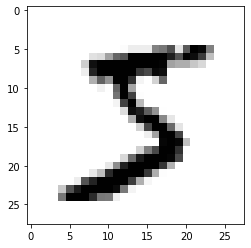

In [4]:
# 28x28차원의 train 데이터 60,000, 28x28차원의 test 데이터 10,000
print(train_images.shape, test_images.shape, "\n")
# 손글씨가 의미하는 숫자 값
print(train_labels, test_labels, "\n")
# print(train_images[0])

plt.imshow(train_images[0], cmap = plt.cm.binary)
plt.show()

- 이미지의 픽셀은 보통 0부터 255까지 값을 갖는데 이를 0과 1사이의 값으로 만들어주기 위해 255로 나누는 작업을 시행한다.

In [16]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
# 0-9까지의 숫자를 one-hot 인코딩
train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)

print(train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]



- CNN은 일반적인 fully connected layer를 나타내는 Dense함수 대신에 convolution layer인 Conv1D, Conv2D, Conv3D를 사용한다.
- 1D와 2D 그리고 3D의 구분은 1차원 윈도우를 사용할 경우 1D, 2차원 윈도우를 사용할 경우 2D, 그리고 3차원 윈도우를 사용하면 3D이다.
- 일반적인 이미지는 2차원 윈도우를 사용하고 동영상과 같이 이미지 + 시간(프레임)인 경우 3차원 윈도우를 사용한다.
- 1차원 윈도우는 시계열과 같은 특별한 경우 사용할 수 있다.
- Conv2D의 인자는 output depth, 윈도우 크기, activation 함수 등으로 이루어져 있으며 이번 예제에서는 3x3 윈도우를 사용한 convolution layer로 모형을 구성하였다.
- strides 인자는 두 번의 연속적인 윈도우 사이의 거리로 step size라 생각할 수 있다. 기본적으로 strides는 1을 사용하고 2를 사용할 경우 1을 사용했을 때 layer의 차원에 절반정도로 차원이 형성된다.
- convolution layer를 지나 최종적으로는 fully connected layer를 통해 output을 산출한다.
- convolution layer와 fully connected layer의 연결은 flatten함수를 사용하여 convolution 구조를 1차원 벡터로 변환한 후 연결한다.
- Pooling은 지정한 윈도우 크기에 맞는 패치를 추출하고 각 채널별로 (예제에서는 채널이 1임) 최대값을 출력하게 된다. 

In [56]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), strides = 1, activation = "relu", input_shape = (28, 28, 1, )))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(10, activation = "softmax"))
model.summary()

model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), strides = 2, activation = "relu", input_shape = (28, 28, 1, )))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_9 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                495680    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                650       
Total params: 515,146
Trainable params: 515,146
Non-trainable params: 0
_________________________________________________________________
____

- y가 범주형이므로 loss에 categorical_crossentropy를 사용한다.

In [57]:
model.compile(optimizer = "sgd",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [59]:
model.fit(train_images, train_labels, epochs = 10, batch_size = 256)

Epoch 1/10
60000/60000 [==============================] - 30s 500us/step - loss: 0.9260 - acc: 0.7808
Epoch 2/10
60000/60000 [==============================] - 31s 509us/step - loss: 0.3684 - acc: 0.8893
Epoch 3/10
60000/60000 [==============================] - 37s 621us/step - loss: 0.3134 - acc: 0.9059
Epoch 4/10
60000/60000 [==============================] - 38s 640us/step - loss: 0.2791 - acc: 0.9169
Epoch 5/10
60000/60000 [==============================] - 35s 589us/step - loss: 0.2468 - acc: 0.9258
Epoch 6/10
60000/60000 [==============================] - ETA: 0s - loss: 0.2232 - acc: 0.933 - 34s 560us/step - loss: 0.2230 - acc: 0.9334
Epoch 7/10
60000/60000 [==============================] - 30s 497us/step - loss: 0.2054 - acc: 0.9384
Epoch 8/10
60000/60000 [==============================] - 30s 505us/step - loss: 0.1894 - acc: 0.9435
Epoch 9/10
60000/60000 [==============================] - 30s 496us/step - loss: 0.1757 - acc: 0.9479
Epoch 10/10
60000/60000 [===================

In [69]:
# model.save("ex_mnist.h5")
# models.load_model("ex_mnist.h5")

In [74]:
# from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# train_datagen = ImageDataGenerator(rescale = 1. / 255)
# test_datagen = ImageDataGenerator(rescale = 1. / 255)

# train_generator = train_datagen.flow_from_directory(train_dir, target_size = (28, 28), batch_size = 20, class_mode = "categorical")
# validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (28, 28), batch_size = 20, class_model = "categorical")

# history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30, 
#                              vlidation_data = validation_generator, validation_steps = 50)

## Recurrent Neural Network (RNN)

- 앞서 설명한 fully connected 신경망과 CNN은 메모리가 없다 (여기서 메모리는 기억하는 능력).
- 하지만 시퀀스나 시계열 데이터를 처리에서 이러한 메모리 능력은 성능을 더 향상시켜줄 수 있다 (예를 들어 AR, MA 모형)
- RNN은 t시점의 출력에 t-1 시점의 출력이 더해지는 형태로 이전 시점의 출력을 기억해 다음 시점에 영향을 준다고 볼 수 있다.
- RNN을 구성하는 방법은 layers.SimpleRNN을 이용할 수 있다.
- SimpleRNN의 입력은 (batch_size, timesteps, input_features)로 되어 있어 이 형태에 맞춰 입력데이터를 변환해주어야 한다.
- 즉, 아래와 같이 하나의 관측치는 행 방향으로 timesteps을 가지고 열 방향으로 특성을 갖는 데이터이다 (관측치까지 포함하여 총 3차원 데이터).

In [19]:
sample1 = np.random.random((10, 3))
print(sample1)

[[0.27592385 0.72894211 0.03599346]
 [0.92322249 0.00794755 0.98331935]
 [0.69407542 0.0586693  0.06637979]
 [0.27789378 0.51585338 0.00325667]
 [0.90317277 0.57116882 0.24121566]
 [0.64105797 0.97053364 0.83762517]
 [0.01441893 0.47993864 0.72854565]
 [0.56255475 0.93081124 0.84045122]
 [0.3285138  0.14724177 0.07990898]
 [0.4026298  0.98645396 0.13911373]]


- 이전 IMDB 데이터에 RNN 모형을 적용해보자.
- 이 예제에서 나오는 Embedding의 정확한 개념 설명은 생략하며 고차원 벡터를 저차원으로 변환해주는 방법으로 이해하면 된다. 
- Embedding layer는 시퀀스로 출력되므로 따로 처리할 필요 없이 SimpleRNN으로 연결해주면 된다.

In [3]:
from keras.preprocessing import sequence
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = 10000)
train_x = sequence.pad_sequences(input_train, maxlen = 500)
test_x = sequence.pad_sequences(input_test, maxlen = 500)

In [4]:
print(input_train[0], "\n")
# 첫번째와 두번째 문장의 단어 수
print(len(input_train[0]), len(input_train[1]), "\n")
# 500개의 
print(train_x[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 

218 189 

[   0    0    0    0    0    0    0    0    0   

In [46]:
model = models.Sequential()
model.add(layers.Embedding(10000, 32))
model.add(layers.SimpleRNN(16))
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 16)                784       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 320,801
Trainable params: 320,801
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer = "sgd", loss = "binary_crossentropy", metrics = ["acc"])
model.fit(train_x, y_train, epochs = 10, batch_size = 128, validation_split = 0.2, shuffle = False)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.6967 - acc: 0.5039 - val_loss: 0.6953 - val_acc: 0.5050
Epoch 2/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.6936 - acc: 0.5140 - val_loss: 0.6941 - val_acc: 0.5116
Epoch 3/10
20000/20000 [==============================] - 18s 894us/step - loss: 0.6921 - acc: 0.5199 - val_loss: 0.6934 - val_acc: 0.5112
Epoch 4/10
20000/20000 [==============================] - 17s 841us/step - loss: 0.6909 - acc: 0.5263 - val_loss: 0.6927 - val_acc: 0.5126
Epoch 5/10
20000/20000 [==============================] - 17s 842us/step - loss: 0.6897 - acc: 0.5322 - val_loss: 0.6921 - val_acc: 0.5166
Epoch 6/10
20000/20000 [==============================] - 17s 867us/step - loss: 0.6885 - acc: 0.5394 - val_loss: 0.6916 - val_acc: 0.5230
Epoch 7/10
20000/20000 [==============================] - 18s 879us/step - loss: 0.6871 - acc: 0.5437 - val_loss: 0.6909 

- 주식과 같은 시계열 데이터는 Embedding 방법이 필요 없다. 따라서 input_shape를 (batch_size, timesteps, n_feature)로 만들어주면 되고
- batch_size를 생략하면 fit 메서드시 지정하는 batch size로 입력받게 된다.
- 아래 예제는 시점이 총 10이고 변수개수가 2개인 데이터를 입력으로 받는 모형이다.
- return_sequences 인자는 마지막 시점만 출력할 것인지 모든 시점을 출력할 것인지 여부를 결정하는 인자로
- True로 설정하면 모든시점 (예제에서는 10시점에 대해 모두 출력 즉, 데이터 개수 x 시점 만큼의 출력) 출력이 반환된다.
- 보통은 마지막 시점 (가장 최신 시점)의 값을 원하므로 마지막 output layer와 연결할 때는 return_sequences = False로 둔다.

In [34]:
model = models.Sequential()
model.add(layers.SimpleRNN(16, input_shape = (10, 2), activation = "relu", return_sequences = True))
model.add(layers.SimpleRNN(8, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 10, 16)            304       
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


### LSTM & GRU
- RNN을 장시간에 걸친 의존도가 있는 문제에 적용하면 그래디언트 소실 문제(vanishing gradient problem)가 발생한다.
- 이 문제를 해결하기 위해 LSTM과 GRU가 만들어졌다.
- LSTM과 GRU, vanishing gradient problem에 대해서는 아래 링크를 참조
-  https://colah.github.io/posts/2015-08-Understanding-LSTMs/

In [19]:
# LSTM
from keras.layers import LSTM

model = Sequential()
model.add(layers.Embedding(10000, 32))
model.add(LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_x, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 115s 6ms/step - loss: 0.5042 - acc: 0.7632 - val_loss: 0.5101 - val_acc: 0.7926
Epoch 2/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.2952 - acc: 0.8836 - val_loss: 0.5001 - val_acc: 0.7714
Epoch 3/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.2367 - acc: 0.9095 - val_loss: 0.3227 - val_acc: 0.8852
Epoch 4/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.2059 - acc: 0.9236 - val_loss: 0.3384 - val_acc: 0.8842
Epoch 5/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.1773 - acc: 0.9353 - val_loss: 0.3061 - val_acc: 0.8812
Epoch 6/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.1582 - acc: 0.9434 - val_loss: 0.5075 - val_acc: 0.8266
Epoch 7/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.1476 - acc: 0.9464 - val_loss: 0.3057 - val_acc

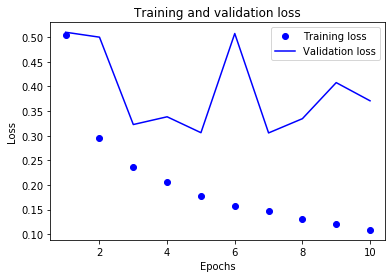

In [21]:
history_dict = history.history
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(loss) + 1)
# 훈련과 검증 손실 그래프
plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [22]:
# GRU
model = Sequential()
model.add(layers.Embedding(10000, 32))
model.add(layers.GRU(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_x, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 57s 3ms/step - loss: 0.5039 - acc: 0.7427 - val_loss: 0.4391 - val_acc: 0.8022
Epoch 2/10
20000/20000 [==============================] - 57s 3ms/step - loss: 0.2918 - acc: 0.8819 - val_loss: 0.3035 - val_acc: 0.8730
Epoch 3/10
20000/20000 [==============================] - 57s 3ms/step - loss: 0.2389 - acc: 0.9082 - val_loss: 0.3360 - val_acc: 0.8750
Epoch 4/10
20000/20000 [==============================] - 57s 3ms/step - loss: 0.2085 - acc: 0.9208 - val_loss: 0.3039 - val_acc: 0.8752
Epoch 5/10
20000/20000 [==============================] - 58s 3ms/step - loss: 0.1822 - acc: 0.9326 - val_loss: 0.3123 - val_acc: 0.8860
Epoch 6/10
20000/20000 [==============================] - 56s 3ms/step - loss: 0.1690 - acc: 0.9378 - val_loss: 0.3306 - val_acc: 0.8700
Epoch 7/10
20000/20000 [==============================] - 56s 3ms/step - loss: 0.1543 - acc: 0.9445 - val_loss: 0.3431 - val_acc:

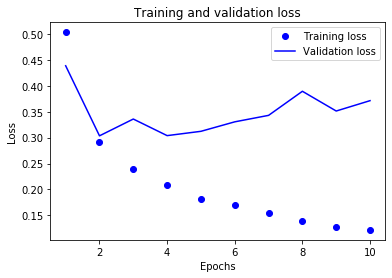

In [23]:
history_dict = history.history
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(loss) + 1)
# 훈련과 검증 손실 그래프
plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# 콜백을 사용하여 모델의 훈련 과정 제어하기

## EarlyStopping 콜백과 모델 체크포인트 저장

- EarlyStopping 콜백을 사용하면 정해진 에포크 동안 모니터링 지표가 향상되지 않을 때 훈련을 중지할 수 있다.
- ModelCheckpoint는 훈련하는 동안 모델을 계속 저장해준다.
- EarlyStopping 콜백의 주요 인자는 monitor와 patience가 있다
- monitor는 모니터링할 값으로 모형이 적합될 때 나오는 값들 (metrics에 지정한 값)을 나타내고 patience는 monitor에 지정한 값이 지정된 횟수 보다 길게 향상되지 않으면 훈련을 중지한다. 보통 분류문제에서는 val_loss를 모니터링하고 val_loss가 지정된 횟수 이상으로 향상되지 않으면 훈련이 중지된다.
- Modelcheckpoint는 반복마다 학습된 모형의 가중치를 저장하게 되는데 save_best_only 인자를 True로 설정하면 모니터하는 값이 가장 좋을 때의 모델만 저장하게 된다.

In [24]:
callbacks_list1 = [
    callbacks.EarlyStopping(monitor = "val_acc", patience = 2),
    callbacks.ModelCheckpoint(filepath = "my_model.h5", monitor = "val_loss", save_best_only = True)
]

## ReduceLROnPlateau 콜백

- ReduceLROnPlateau 콜백을 사용하면 validation loss가 향상되지 않을 때 학습률을 작게 할 수 있다.
- 주요 인자로 monitor와 factor 그리고 patience가 존재한다.
- monitor는 모니터링할 대상, factor는 이 콜백이 호출될 때 학습률을 감소시킬 비율 그리고 patience는 모니터링하는 값이 지정된 횟수 이상 좋아지지 않으면 콜백을 호출한다.

In [22]:
callback_list2 = [
    callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10)
]

In [25]:
# IMDB 데이터셋 불러오기
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)
x_train = vectorize_sequences(train_data)
x_val = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_val = np.asarray(test_labels).astype("float32")

model = models.Sequential()
model.add(layers.Dense(16, activation = "relu", input_shape = (10000, )))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))
model.compile(optimizer = "rmsprop",
             loss = "binary_crossentropy",
             metrics = ["accuracy"],
             )
model.fit(x_train, y_train, epochs = 10, batch_size = 100, validation_data = (x_val, y_val), callbacks = callbacks_list1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 27s 1ms/step - loss: 0.3399 - acc: 0.8644 - val_loss: 0.2791 - val_acc: 0.8895
Epoch 2/10
25000/25000 [==============================] - ETA: 0s - loss: 0.2058 - acc: 0.9220-  - 45s 2ms/step - loss: 0.2065 - acc: 0.9218 - val_loss: 0.2957 - val_acc: 0.8826
Epoch 3/10
25000/25000 [==============================] - 96s 4ms/step - loss: 0.1685 - acc: 0.9369 - val_loss: 0.3239 - val_acc: 0.8767


## 텐서보드 콜백
- 텐서보드는 훈련 모델 내부에서 일어나는 모든 것을 시각적으로 모니터링할 수 있다.
- 텐서보드의 역할
    - 훈련하는 동안 측정 지표를 시각적으로 모니터링
    - 모델 구조를 시각화
    - 활성화 출력과 그래디언트 히스토그램 출력
    - 3D로 임베딩을 표현

In [26]:
# 로그 파일 저장 위치 설정
callbacks_tb = [
    callbacks.TensorBoard(log_dir = "./log_dir", histogram_freq = 1)
]
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 100, validation_data = (x_val, y_val), callbacks = callbacks_tb)

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 47s 2ms/step - loss: 0.0137 - acc: 0.9969 - val_loss: 1.0988 - val_acc: 0.8489
Epoch 2/10
25000/25000 [==============================] - 343s 14ms/step - loss: 0.0094 - acc: 0.9978 - val_loss: 1.2209 - val_acc: 0.8467
Epoch 3/10
25000/25000 [==============================] - ETA: 0s - loss: 0.0073 - acc: 0.998 - 142s 6ms/step - loss: 0.0073 - acc: 0.9982 - val_loss: 1.2530 - val_acc: 0.8487
Epoch 4/10
25000/25000 [==============================] - ETA: 0s - loss: 0.0061 - acc: 0.998 - 213s 9ms/step - loss: 0.0060 - acc: 0.9988 - val_loss: 1.3622 - val_acc: 0.8476
Epoch 5/10
25000/25000 [==============================] - ETA: 0s - loss: 0.0044 - acc: 0.999 - 130s 5ms/step - loss: 0.0043 - acc: 0.9990 - val_loss: 1.4131 - val_acc: 0.8473
Epoch 6/10
25000/25000 [==============================] - ETA: 0s - loss: 0.0034 - acc: 0.999 - 154s 6ms/step - loss: 0.0034 - acc: 0.9994 - val_l

### 텐서보드 서버 실행
- tensorboard -logdir=로그파일 저장된 디렉터리 
- --host주소 지정(default 0.0.0.0)

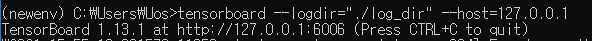

- 주소창에 http://127.0.0.1:6006(default로 지정한 경우 http:localhost:6006 도 가능)

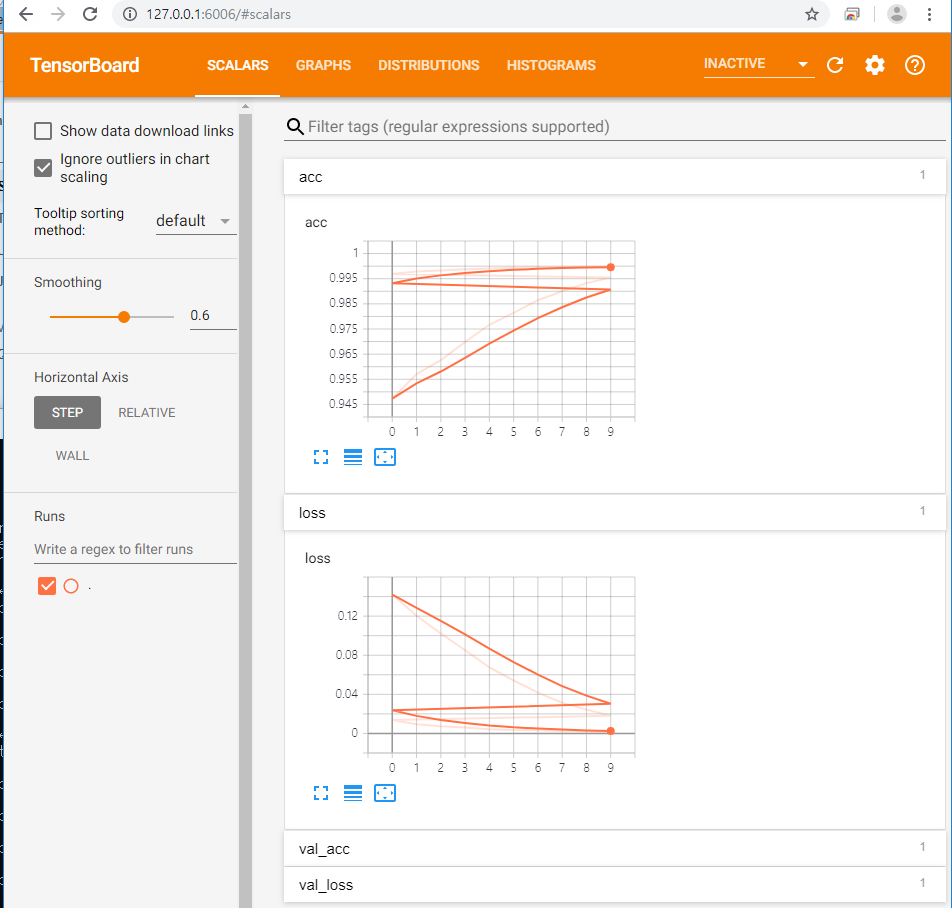